<a href="https://colab.research.google.com/github/isosceles45/DAV55/blob/master/55_DAV_EXP03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiple Linear Regression in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [2]:
df = pd.read_csv('/content/drive/MyDrive/dataset_dav/Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df = df.drop(['No'], axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


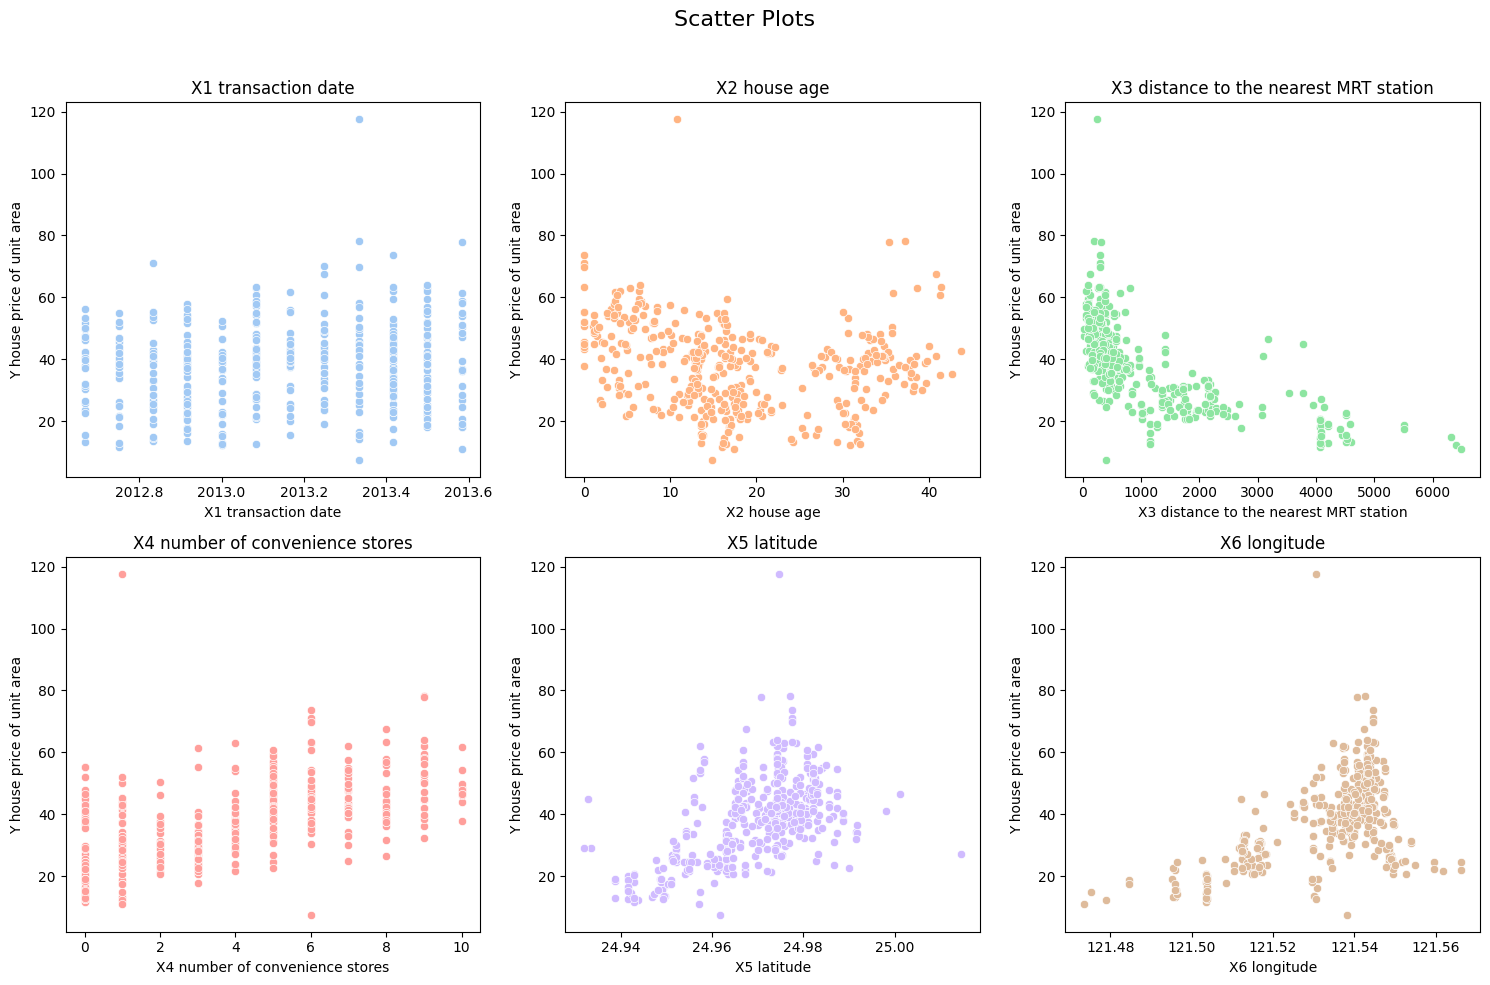

In [8]:
target_variable = "Y house price of unit area"
colors = sns.color_palette("pastel", n_colors=6)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Scatter Plots', fontsize=16)

sns.scatterplot(x=df['X1 transaction date'], y=df[target_variable], ax=axes[0, 0], color=colors[0])
axes[0, 0].set_title('X1 transaction date')

sns.scatterplot(x=df['X2 house age'], y=df[target_variable], ax=axes[0, 1], color=colors[1])
axes[0, 1].set_title('X2 house age')

sns.scatterplot(x=df['X3 distance to the nearest MRT station'], y=df[target_variable], ax=axes[0, 2], color=colors[2])
axes[0, 2].set_title('X3 distance to the nearest MRT station')

sns.scatterplot(x=df['X4 number of convenience stores'], y=df[target_variable], ax=axes[1, 0], color=colors[3])
axes[1, 0].set_title('X4 number of convenience stores')

sns.scatterplot(x=df['X5 latitude'], y=df[target_variable], ax=axes[1, 1], color=colors[4])
axes[1, 1].set_title('X5 latitude')

sns.scatterplot(x=df['X6 longitude'], y=df[target_variable], ax=axes[1, 2], color=colors[5])
axes[1, 2].set_title('X6 longitude')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

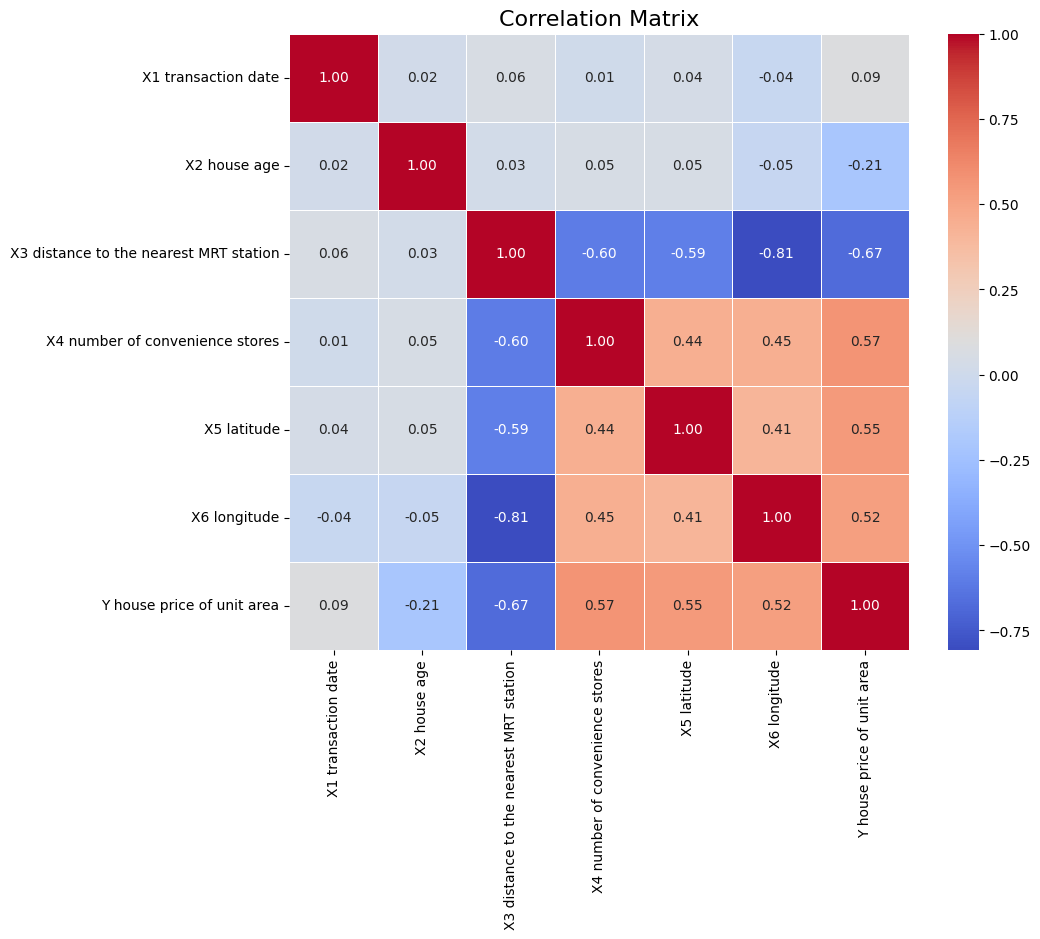

In [9]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

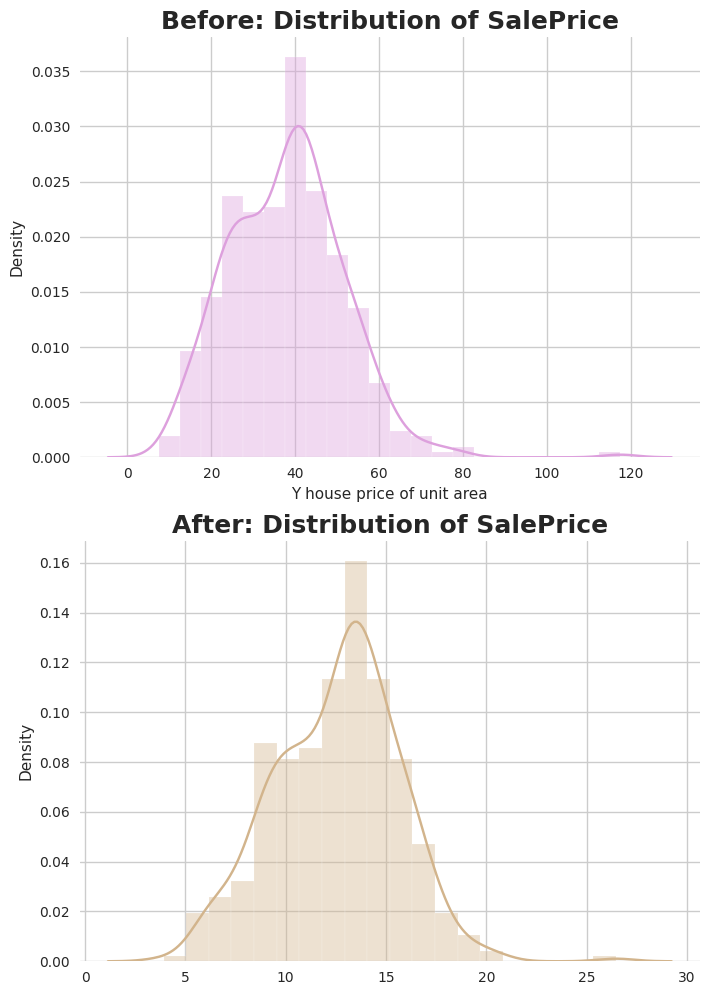

In [10]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,12))

#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,1),(0,0))
sns.distplot(df[target_variable], color='plum')
plt.title('Before: Distribution of SalePrice',weight='bold', fontsize=18)

#first row, second col
transformed_data, lambda_value = boxcox(df[target_variable])
ax1 = plt.subplot2grid((2,1),(1,0))
sns.distplot(transformed_data, color='tan')
plt.title('After: Distribution of SalePrice',weight='bold', fontsize=18)
plt.show()

In [11]:
df[target_variable] = transformed_data


In [12]:
X = df.drop('Y house price of unit area',axis= 1)
y = df['Y house price of unit area']
print(X)
print(y)

     X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
409             2013.000          13.7   
410             2012.667           5.6   
411             2013.250          18.8   
412             2013.000           8.1   
413             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..             

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.5211551138242245


In [15]:
X1 = float(input('Enter transaction date:'))
X2 = float(input('Enter house age:'))
X3 = float(input('Enter distance to the nearest MRT station:'))
X4 = float(input('Enter number of convenience stores:'))
X5 = float(input('Enter latitude:'))
X6 = float(input('Enter longitude:'))

Enter transaction date:2014.5
Enter house age:2.0
Enter distance to the nearest MRT station:180
Enter number of convenience stores:5
Enter latitude:20
Enter longitude:100


In [17]:
new_data = np.array([[X1, X2, X3, X4, X5, X6]])

predicted_price = model.predict(new_data)
predicted_price

array([-188.14294937])

In [18]:
r_squared_train = model.score(X_train, y_train)
print(f'R-squared (Coefficient of Determination) on Training Data: {r_squared_train:.2f}')

intercept = model.intercept_
coefficients = model.coef_

print(f'Intercept: {intercept:.2f}')
print('Coefficients:')
for i, coef in enumerate(coefficients):
    print(f'   Coefficient for X{i + 1}: {coef:.2f}')

R-squared (Coefficient of Determination) on Training Data: 0.61
Intercept: -3314.75
Coefficients:
   Coefficient for X1: 1.17
   Coefficient for X2: -0.06
   Coefficient for X3: -0.00
   Coefficient for X4: 0.24
   Coefficient for X5: 57.23
   Coefficient for X6: -3.71


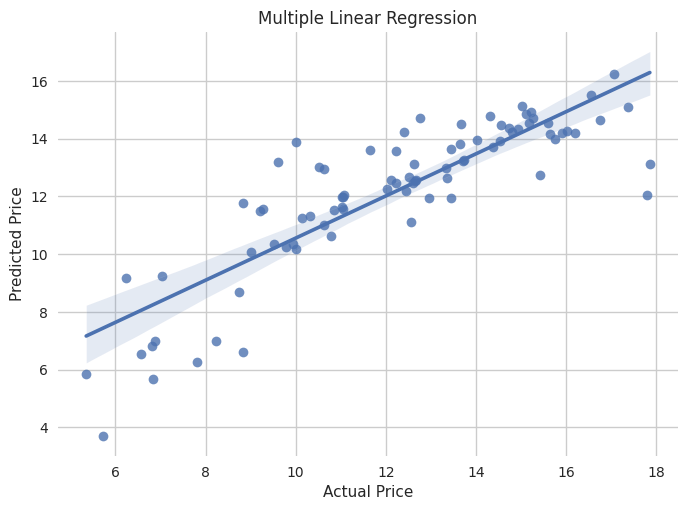

In [19]:
sns.regplot(x=y_test, y=y_pred)

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()

## Implementation in R

In [2]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(tidyverse)
library(gridExtra)
library(dplyr)
library(broom)
library(ggplot2)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [4]:
df <- read.csv("/content/drive/MyDrive/dataset_dav/Real estate.csv")
head(df)

,No,X1.transaction.date,X2.house.age,X3.distance.to.the.nearest.MRT.station,X4.number.of.convenience.stores,X5.latitude,X6.longitude,Y.house.price.of.unit.area
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
4,4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
5,5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
6,6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1


In [5]:
model <- lm(Y.house.price.of.unit.area ~ X1.transaction.date + X2.house.age + X3.distance.to.the.nearest.MRT.station + X4.number.of.convenience.stores + X5.latitude + X6.longitude, data = df)

In [6]:
summary(model)


Call:
lm(formula = Y.house.price.of.unit.area ~ X1.transaction.date + 
    X2.house.age + X3.distance.to.the.nearest.MRT.station + X4.number.of.convenience.stores + 
    X5.latitude + X6.longitude, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.664  -5.410  -0.966   4.217  75.193 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                            -1.444e+04  6.776e+03  -2.131  0.03371
X1.transaction.date                     5.146e+00  1.557e+00   3.305  0.00103
X2.house.age                           -2.697e-01  3.853e-02  -7.000 1.06e-11
X3.distance.to.the.nearest.MRT.station -4.488e-03  7.180e-04  -6.250 1.04e-09
X4.number.of.convenience.stores         1.133e+00  1.882e-01   6.023 3.84e-09
X5.latitude                             2.255e+02  4.457e+01   5.059 6.38e-07
X6.longitude                           -1.242e+01  4.858e+01  -0.256  0.79829
                                          
(Intercept)   